In [1]:
import networkx as nx
import dwave_networkx as dnx
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from itertools import permutations
from uccgGenerator import tree_insertion, Graph
from plotNetwork import *
from networkx.algorithms.chordal import chordal_graph_cliques
from networkx.algorithms.approximation import treewidth_min_fill_in, maximum_independent_set

In [2]:
nx.__version__

'2.5'

In [3]:
def valid_is(g):
    return any([g.nodes[u][in_current] and g.nodes[v][in_current] for u, v in g.edges])

def is_same(g1, g2):
    return all([g1.nodes[u][in_current] !=  g2.nodes[u][in_current] for u in g1])

def size_is(g):
    return len([u for u in g if g.nodes[u][in_current]])

def get_neighbors(g, u):
    return set(g.neighbors(u))

def get_neighbors_dist_two(g, u):
    return set.union(*[{w for w in g.neighbors(v)} for v in g.neighbors(u)]) - get_neighbors(g, u)

def can_add(g, u):
    return not any([g.nodes[v][in_current] for v in g.neighbors(u)])

def vertices_can_add(g):
    return {u for u in g if can_add(g, u) if not g.nodes[u][in_current]}

def is_maximal(g):
    return not vertices_can_add(g)

In [4]:
def remove(g, u):
    """
    u is in g, remove u and try to add all u's neighbors.
    """
    g.nodes[u][in_current] = False
    has_add = False
    for v in g.neighbors(u):
        if can_add(g, v):
            g.nodes[v][in_current] = True
            has_add = True
    move = f"remove {u}"
    if not has_add:
        g.nodes[u][in_current] = True
        move = 'stay'
    return move

In [5]:
def add(g, u):
    """
    if u is not in g, remove all its neighbors, and add
    """
    for v in g.neighbors(u):
        g.nodes[v][in_current] = False
    g.nodes[u][in_current] = True
    for w in get_neighbors_dist_two(g, u):
        if can_add(g, w):
            g.nodes[w][in_current] = True

### How to show this is always a maximum independendent set?

* 1 Show that any other independent sets can get to this one
* 2 Show any two independent sets are connected

True


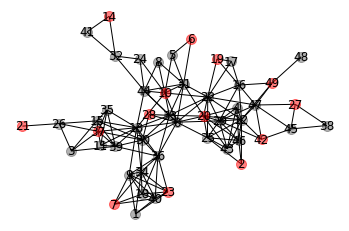

In [19]:
n = 50
m = 150
g = tree_insertion(n, m) 
mis = nx.maximal_independent_set(g)
for u in g:
    g.nodes[u][in_current] = u in mis
g0 = nx.Graph(g)
plotGraphIS(g)
print(is_maximal(g))

In [20]:
count = 0
for i in range(100):
    u = random.sample(g.nodes, 1)[0]
    move = "stay"
    g_before = nx.Graph(g)
    if g.nodes[u][in_current]:
        move = remove(g, u)
    else:
        add(g, u)
        move = f"add {u}"
    if not valid_is or not is_maximal(g):
        print('wrong')
        print(move)
        plotGraphIS(g_before)
        plotGraphIS(g)
        break
    if move == 'stay':
        count += 1
print(count)

11


<Figure size 720x720 with 0 Axes>

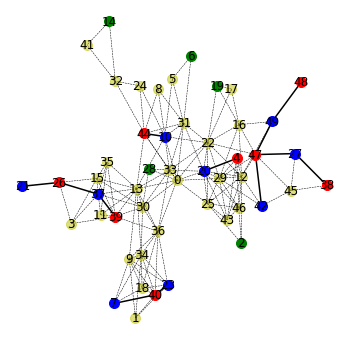

In [21]:
I, F = g0, g
IXorF = Graph(g)
for u in IXorF:
    if I.nodes[u][in_current] and F.nodes[u][in_current]:
        IXorF.nodes[u][label] = COMMON
    elif I.nodes[u][in_current]:
        IXorF.nodes[u][label] = INIT
    elif F.nodes[u][in_current]:
        IXorF.nodes[u][label] = FINAL
    else:
        IXorF.nodes[u][label] = NOTIN
plt.figure(figsize=(10, 10))
plotSymmetricDiff(IXorF)